In [1]:
########################### EXERCISE 2 ###############################################
# Pick a classification dataset from the LIBSVM repository:
# Run SVM to train a classifier, using a radial basis function as a kernel function. 
# Apply cross-validation to evaluate different combinations of values of the model parameters 
# (box constraint C and kernel parameter γ).
# A. How sensitive is the cross-validation error to changes in C and γ? 
# B. Choose the combination of C and γ that minimizes the cross-validation error
# C. train the SVM on the entire dataset and report the total classification error.
# Advice: use a logaritmic range for parameter γ.
######################################################################################

#NOTE: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py

In [2]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
from sklearn.svm import SVC  
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
# Pick a classification dataset, load the file and read the labels in Y and data in X
X, Y = load_svmlight_file('/Users/aideenf/Desktop/Datasets/diabetes_scale.svm')

#Split the data into training/test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [4]:
####################################################
# A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. 
# In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane
# which categorizes new example. SVM differs from the other classification algorithms by the way in which it chooses
# the decision boundary to maximize the distance from the nearest data points of all the classes. 
# An SVM doesn't merely find a decision boundary; it finds the most optimal decision boundary, the one which has 
# maximum margin from the nearest points of all the classes. The nearest points from the decision boundary 
# that maximize the distance between the decision boundary and the points are called support vectors (the maximum 
# margin classifier) https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

# The Radial basis function kernel, also called the RBF kernel, or Gaussian kernel, is a kernel that 
# is in the form of a radial basis function (more specifically, a Gaussian function). The RBF kernel is defined as
# http://pages.cs.wisc.edu/~matthewb/pages/notes/pdf/svms/RBFKernel.pdf

# When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered:
# C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples 
# against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C 
# aims at classifying all training examples correctly. 
# gamma defines how much influence a single training example has. The larger gamma is, the closer 
# other examples must be to be affected.Proper choice of C and gamma is critical to the SVM’s performance.
### Gamma(γ) #################
# Intuitively, the gamma parameter defines how far the influence of a single training example reaches, 
# with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the
# inverse of the radius of influence of samples selected by the model as support vectors.
### Box constraint C ###### 
# The basic idea is that when the data is not perfectly separable, the training algorithm 
# must allow some mis-classification in the training set. In this case it is applying a cost to the misclassification.
# The higher the box-constraint the higher the cost of the misclassified points, leading to a more strict separation
# of the data. The C parameter trades off correct classification of training examples against maximization 
# of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision 
# function is better at classifying all training points correctly. A lower C will encourage a larger margin, 
# therefore a simpler decision function, at the cost of training accuracy. In other words``C`` behaves as a 
#regularization parameter in the SVM.

In [5]:
# GAMMA and C configuration
# our hint is to "use logritmmic range" for gamma: 
# what is a logritmic range?
# "Notice an interesting thing about the logarithmic scale: 
# the distance from 1 to 2 is the same as the distance from 2 to 4, or from 4 to 8. 
# In fact any equal multiplication has the same distance: so 1 to 3 is the same as 3 to 9."

# use np.logspace to define logritmic range
#start: the starting value of the sequence.
#stop : the final value of the sequence
#num  : Number of samples to generate. Default is 50.

#QUESTION: HOW DO WE KNOW WHAT RANGE TO USE??????
# "To determine good values (by Cross Validation), 
# it is important to search on the right scale. We therefore fix default values for C and σ 
# that have the right order of magnitude: In a c-class problem we use the 1/c quantile of the pairwise 
# distances of all data-points as a default for σ. 
# The default for C is the inverses of the empirical variance s2 in features space. "
# https://stats.stackexchange.com/questions/43943/which-search-range-for-determining-svm-optimal-c-and-gamma-parameters

C_range = np.logspace(0.5, 4, 13)
gamma_range = np.logspace(-2, 3, 13)

param_grid = dict(gamma=gamma_range, C=C_range)


In [6]:
# -----Apply cross-validation to evaluate different combinations of values of the model parameters----
# INITIALISE THE CROSS_VALIDATIOR
# Stratified ShuffleSplit cross-validator Provides train/test indices to split data in train/test sets.
# This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified
# randomized folds. The folds are made by preserving the percentage of samples for each class.
# Note: like the ShuffleSplit strategy, stratified random splits do not guarantee that all folds will be different,
# although this is still very likely for sizeable datasets.

cross_validate = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

In [7]:
# GridSearchCV is a "grid-search" on C and γ using cross-validation.
# Various pairs of (C,γ) values are tried and the one with the best cross-validation accuracy are returned.
# one of the input paramaters is our C and gamma range, these ranges will be used.
# σ is for the RBF kernel and C for the SVM. 
# THIS SECTION OF CODE TAKES 10s or so to run. 

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cross_validate)
grid.fit(X_train, Y_train)
print(grid)
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([1.00000e-02, 2.61016e-02, 6.81292e-02, 1.77828e-01, 4.64159e-01,
       1.21153e+00, 3.16228e+00, 8.25404e+00, 2.15443e+01, 5.62341e+01,
       1.46780e+02, 3.83119e+02, 1.00000e+03]), 'C': array([3.16228e+00, 6.18966e+00, 1.21153e+01, 2.37137e+01, 4.64159e+01,
       9.08518e+01, 1.77828e+02, 3.48070e+02, 6.81292e+02, 1.33352e+03,
       2.61016e+03, 5.10897e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
The best parameters are {'C': 3.1622776601683795, '

In [22]:
#train the SVM on the entire dataset and report the total classification error.
rbf_svc = SVC(kernel='rbf', C=3.4622776601683795, gamma= 7.96812920690579616)
rbf_svc.fit(X, Y)
Y_pred = rbf_svc.predict(X)
accuracy = accuracy_score(Y,Y_pred)*100
print(accuracy)


98.95833333333334


In [9]:
# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

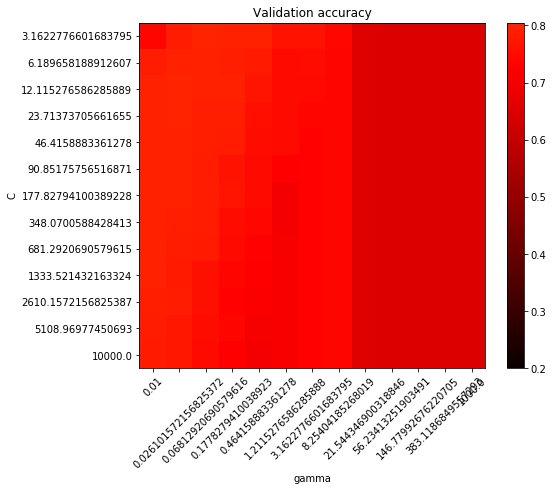

In [10]:
# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [11]:
#https://github.com/Jam3/math-as-code